In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [7]:
train=pd.read_csv("../titanic/train.csv")
test=pd.read_csv("../titanic/test.csv")

In [8]:
train.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [9]:
print("plcass unique",train.Pclass.unique())
print("SibSp unique",train.SibSp.unique())
print("parch unique",train.Parch.unique())
print("Cabin unique",train.Cabin.unique())

plcass unique [3 1 2]
SibSp unique [1 0 3 4 2 5 8]
parch unique [0 1 2 5 3 4 6]
Cabin unique [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' '

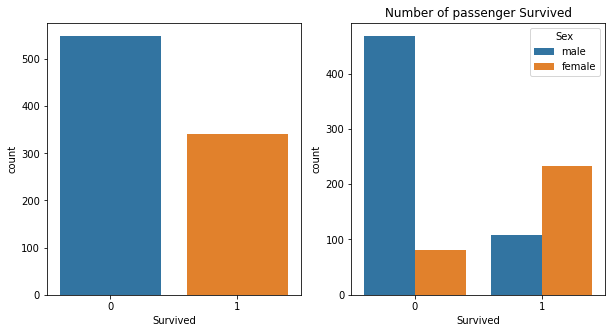

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(train.Survived)
plt.subplot(1,2,2)
sns.countplot(x="Survived",hue="Sex",data=train)
plt.title('Number of passenger Survived');

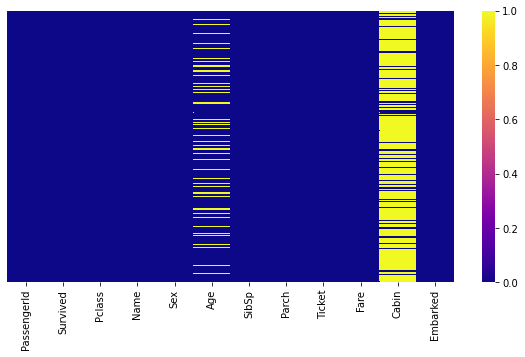

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(train.isnull(),yticklabels=False,cmap="plasma")

In [12]:
train['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [13]:
train.shape

(891, 12)

In [14]:
def bar(feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.countplot(train[feature])
    plt.subplot(1,2,2)
    sns.countplot(x="Survived",hue=feature,data=train)

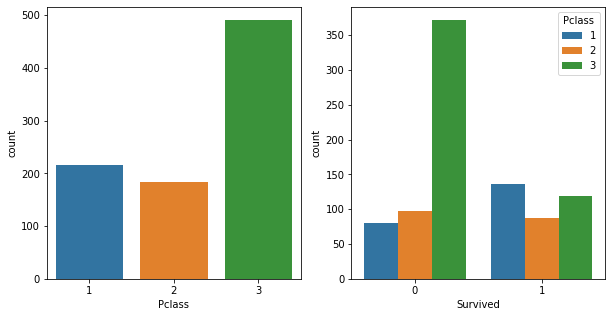

In [15]:
bar("Pclass")

In [16]:
pclass1=train[train.Pclass==1]['Survived'].value_counts(normalize=True).values[0]*100;
pclass2=train[train.Pclass==2]['Survived'].value_counts(normalize=True).values[1]*100;
pclass3=train[train.Pclass==3]['Survived'].value_counts(normalize=True).values[1]*100;
print("Pclaas-1: {:.1f}% People Survived".format(pclass1))
print("Pclaas-2: {:.1f}% People Survived".format(pclass2))
print("Pclaas-3: {:.1f}% People Survived".format(pclass3))

Pclaas-1: 63.0% People Survived
Pclaas-2: 47.3% People Survived
Pclaas-3: 24.2% People Survived


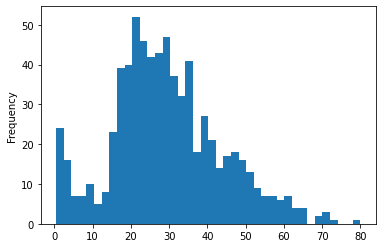

In [17]:
train.Age.plot(kind='hist',bins=40)

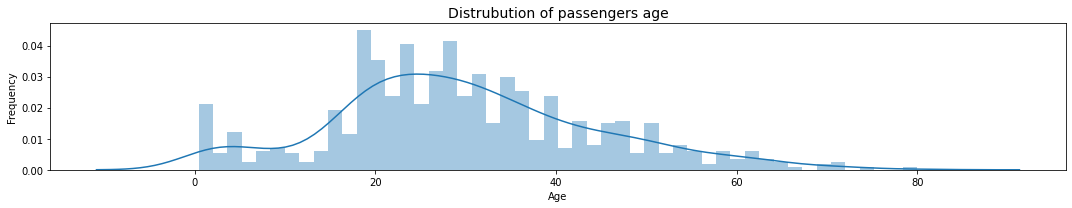

In [18]:
plt.figure(figsize=(15, 3))
sns.distplot(train[(train["Age"] > 0)].Age, bins = 50)
plt.title('Distrubution of passengers age',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()

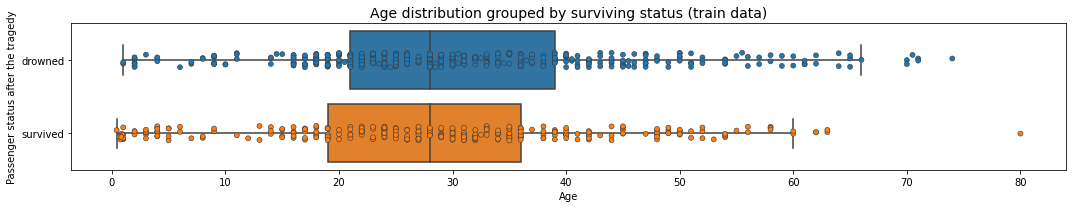

In [19]:
plt.figure(figsize=(15, 3))
sns.boxplot(y = 'Survived', x = 'Age', data = train, fliersize = 0, orient = 'h')
sns.stripplot(y = 'Survived', x = 'Age', data = train, linewidth = 0.6, orient = 'h')

plt.yticks( np.arange(2), ['drowned', 'survived'])
plt.title('Age distribution grouped by surviving status (train data)',fontsize= 14)
plt.ylabel('Passenger status after the tragedy')
plt.tight_layout()

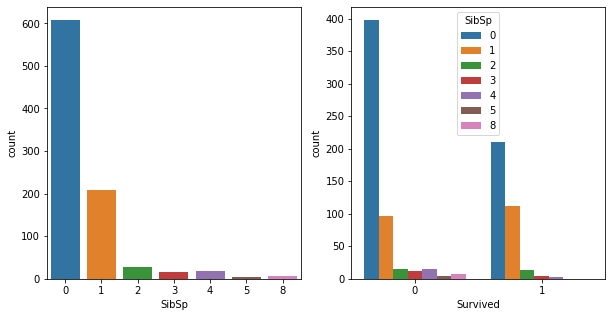

In [20]:
bar("SibSp")

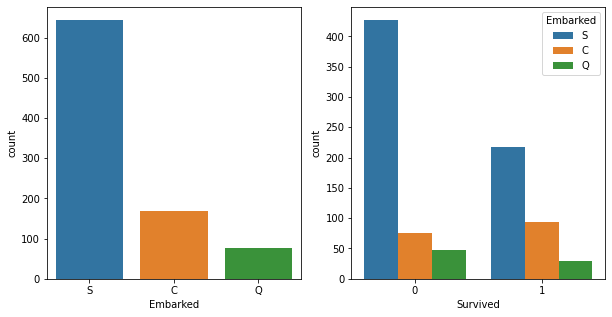

In [21]:
bar("Embarked")

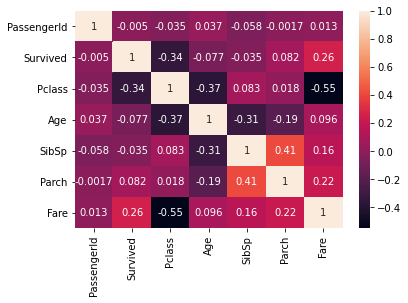

In [22]:
sns.heatmap(train.corr(),annot=True)

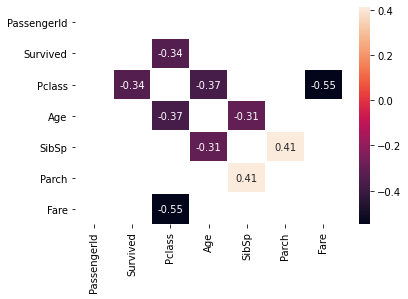

In [23]:
corr=train.corr()
sns.heatmap(corr[((corr >= 0.3) | (corr <= -0.3)) & (corr != 1)], annot=True, linewidths=.5, fmt= '.2f')

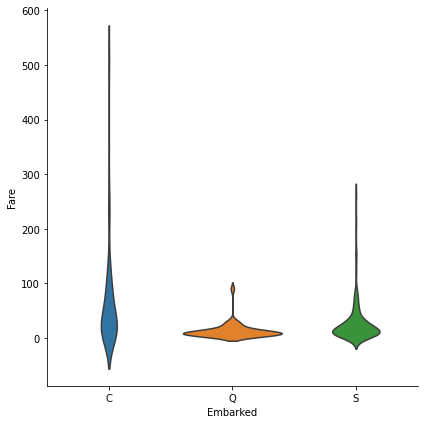

In [24]:
sns.catplot(x='Embarked',y="Fare",kind="violin",inner=None,data=train, height=6, order=['C','Q','S'])

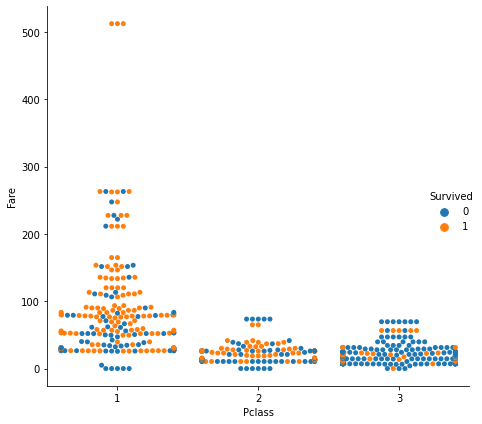

In [25]:
sns.catplot(x='Pclass',y="Fare",height=6, hue="Survived",data=train,kind='swarm')
plt.tight_layout()

Missing Data Handling

In [26]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

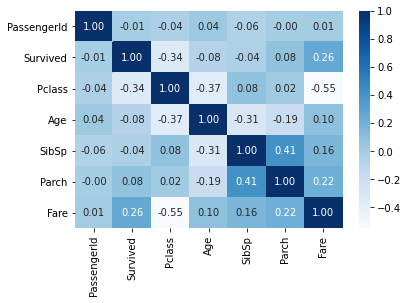

In [28]:
sns.heatmap(train.corr(), annot=True, fmt='.2f',cmap='Blues')

In [29]:
train.loc[train.Age.isnull(),'Age']=train.groupby('Pclass').Age.transform('median')
test.loc[test.Age.isnull(),'Age']=test.groupby('Pclass').Age.transform('median')

In [30]:
train.Age.isnull().sum()

0

In [31]:
train.loc[train.Fare.isnull(),'Fare']=train.groupby('Pclass').Fare.transform(lambda x: x.fillna(x.median()))
test.loc[test.Fare.isnull(),'Fare']=test.groupby('Pclass').Fare.transform(lambda x: x.fillna(x.median()))

In [32]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
test.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [34]:
train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')

In [35]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
D              3
F33            3
              ..
C118           1
C95            1
E50            1
C85            1
E10            1
Name: Cabin, Length: 147, dtype: int64

In [37]:
train.Cabin.isnull().sum()

687

In [38]:
train['Cabin']=train.Cabin.fillna('U')
test['Cabin']=test.Cabin.fillna('U')

### feature engineering

In [39]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [40]:
train['Sex'][train['Sex']=='male']=0
train['Sex'][train['Sex']=='female']=1

test['Sex'][test['Sex']=='male']=0
test['Sex'][test['Sex']=='female']=1

In [41]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

### start one-hot encoder tech

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

encoder =OneHotEncoder()
label_encoder = preprocessing.LabelEncoder()

temptemp=label_encoder.fit_transform(train['Embarked'])
temptemp=temptemp.reshape(len(temptemp),1)
#temp=pd.DataFrame(encoder.fit_transform(temptemp))

temp = pd.DataFrame(encoder.fit_transform(temptemp).toarray(),columns=['S', 'C', 'Q'])
train = train.join(temp)
train.drop(columns='Embarked', inplace=True)


temptemp=label_encoder.fit_transform(test['Embarked'])
temptemp=temptemp.reshape(len(temptemp),1)
#temp=pd.DataFrame(encoder.fit_transform(temptemp))

temp = pd.DataFrame(encoder.transform(temptemp).toarray(), columns=['S', 'C', 'Q'])
test = test.join(temp)
test.drop(columns='Embarked', inplace=True)

In [43]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'S', 'C', 'Q'],
      dtype='object')

In [44]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris   0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   1  38.0      1      0   
2                             Heikkinen, Miss. Laina   1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   1  35.0      1      0   
4                           Allen, Mr. William Henry   0  35.0      0      0   

             Ticket     Fare Cabin    S    C    Q  
0         A/5 21171   7.2500     U  0.0  0.0  1.0  
1          PC 17599  71.2833   C85  1.0  0.0  0.0  
2  STON/O2. 3101282   7.9250     U  0.0  0.0  1.0  
3            113803  53.1000  C123  0.0  0.0  1.0  
4            373450   8.0500     U  0.0  0.0  1.0

In [45]:
test.head()

PassengerId  Pclass                                          Name Sex  \
0          892       3                              Kelly, Mr. James   0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)   1   
2          894       2                     Myles, Mr. Thomas Francis   0   
3          895       3                              Wirz, Mr. Albert   0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   1   

    Age  SibSp  Parch   Ticket     Fare Cabin    S    C    Q  
0  34.5      0      0   330911   7.8292     U  0.0  1.0  0.0  
1  47.0      1      0   363272   7.0000     U  0.0  0.0  1.0  
2  62.0      0      0   240276   9.6875     U  0.0  1.0  0.0  
3  27.0      0      0   315154   8.6625     U  0.0  0.0  1.0  
4  22.0      1      1  3101298  12.2875     U  0.0  0.0  1.0

In [46]:
test.Cabin.value_counts()

U                  327
B57 B59 B63 B66      3
C116                 2
C31                  2
E34                  2
                  ... 
B24                  1
B78                  1
C7                   1
B36                  1
D30                  1
Name: Cabin, Length: 77, dtype: int64

In [47]:
train['Cabin'] = train['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
test['Cabin'] = test['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())

In [48]:
train.Cabin.unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [49]:
test.Cabin.unique()

array(['U', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [50]:
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
train['Cabin']=train['Cabin'].map(cabin_category)
test['Cabin']=test['Cabin'].map(cabin_category)

In [51]:
test.Cabin.unique()

array([9, 2, 5, 1, 3, 4, 6, 7])

In [52]:
train.Name.tolist()[0:20]

['Braund, Mr. Owen Harris',
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 'Heikkinen, Miss. Laina',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Allen, Mr. William Henry',
 'Moran, Mr. James',
 'McCarthy, Mr. Timothy J',
 'Palsson, Master. Gosta Leonard',
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 'Nasser, Mrs. Nicholas (Adele Achem)',
 'Sandstrom, Miss. Marguerite Rut',
 'Bonnell, Miss. Elizabeth',
 'Saundercock, Mr. William Henry',
 'Andersson, Mr. Anders Johan',
 'Vestrom, Miss. Hulda Amanda Adolfina',
 'Hewlett, Mrs. (Mary D Kingcome) ',
 'Rice, Master. Eugene',
 'Williams, Mr. Charles Eugene',
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
 'Masselmani, Mrs. Fatima']

In [53]:
train['Name']=train['Name'].str.extract(' ([a-zA-Z]+)\.',expand=False)
test['Name']=test['Name'].str.extract(' ([a-zA-Z]+)\.',expand=False)

In [54]:
train.Name.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [55]:
train.rename(columns={'Name':'Title'}, inplace=True)
train['Title'] = train['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')
test.rename(columns={'Name':'Title'},inplace=True)
test['Title'] = test['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [56]:
train['Title'].value_counts(normalize=True)*100

Mr        58.024691
Miss      20.426487
Mrs       14.029181
Master     4.489338
Other      3.030303
Name: Title, dtype: float64

In [57]:
encoder = OneHotEncoder()
label_encoder=preprocessing.LabelEncoder()

temptemp=label_encoder.fit_transform(train['Title'])
temptemp=temptemp.reshape(len(temptemp),1)
temp = pd.DataFrame(encoder.fit_transform(temptemp).toarray())
train = train.join(temp)
train.drop(columns='Title', inplace=True)

temptemp=label_encoder.fit_transform(test['Title'])
temptemp=temptemp.reshape(len(temptemp),1)
temp = pd.DataFrame(encoder.transform(temptemp).toarray())
test = test.join(temp)
test.drop(columns='Title', inplace=True)

In [58]:
train['familySize']=train['SibSp']+train['Parch']+1
test['familySize']=test['SibSp']+train['Parch']+1

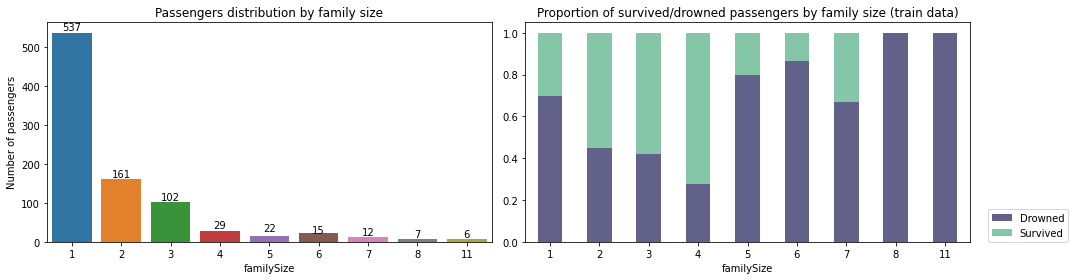

In [59]:
fig = plt.figure(figsize = (15,4))

ax1 = fig.add_subplot(121)
ax = sns.countplot(train['familySize'], ax = ax1)

# calculate passengers for each category
labels = (train['familySize'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+6, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
plt.title('Passengers distribution by family size')
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(122)
d = train.groupby('familySize')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True', ax = ax2)
plt.title('Proportion of survived/drowned passengers by family size (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)

plt.tight_layout()

In [60]:
train=train.drop(columns=['SibSp','Parch','Ticket'])
test=test.drop(columns=['SibSp','Parch','Ticket'])

In [61]:
train.head(5)

PassengerId  Survived  Pclass Sex   Age     Fare  Cabin    S    C    Q  \
0            1         0       3   0  22.0   7.2500      9  0.0  0.0  1.0   
1            2         1       1   1  38.0  71.2833      3  1.0  0.0  0.0   
2            3         1       3   1  26.0   7.9250      9  0.0  0.0  1.0   
3            4         1       1   1  35.0  53.1000      3  0.0  0.0  1.0   
4            5         0       3   0  35.0   8.0500      9  0.0  0.0  1.0   

     0    1    2    3    4  familySize  
0  0.0  0.0  1.0  0.0  0.0           2  
1  0.0  0.0  0.0  1.0  0.0           2  
2  0.0  1.0  0.0  0.0  0.0           1  
3  0.0  0.0  0.0  1.0  0.0           2  
4  0.0  0.0  1.0  0.0  0.0           1

### Dataset is Completely ready

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train.drop(columns=['Survived','PassengerId'], axis=1),train['Survived'], test_size= 0.2, random_state=2)

### Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
print("R-Squared for Train set: {:.3f}".format(linreg.score(X_train, Y_train)))
print("R-Squared for test set: {:.3f}" .format(linreg.score(X_test, Y_test)))

R-Squared for Train set: 0.460
R-Squared for test set: 0.374


### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000, C=50)
logreg.fit(X_train, Y_train)
print("R-Squared for Train set: {:.3f}".format(logreg.score(X_train, Y_train)))
print("R-Squared for test set: {:.3f}" .format(logreg.score(X_test, Y_test)))

R-Squared for Train set: 0.847
R-Squared for test set: 0.804


### Magic weapon#1: MinMaxScaler

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train_scal= scaler.fit_transform(X_train)
X_test_scal=scaler.fit_transform(X_test)

In [67]:
logreg=LogisticRegression(max_iter=10000)
logreg.fit(X_train_scal,Y_train)

print("R-Squared for Train set: {:.3f}".format(logreg.score(X_train_scal, Y_train)))
print("R-Squared for test set: {:.3f}" .format(logreg.score(X_test_scal, Y_test)))

R-Squared for Train set: 0.847
R-Squared for test set: 0.804


In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(Y_test, y_pred))

Accuracy: 0.7262569832402235


In [70]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scal,Y_train)
y_pred=knn.predict(X_test_scal)

In [71]:
from sklearn.metrics import accuracy_score
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(Y_test, y_pred))

Accuracy: 0.7932960893854749


In [72]:
from sklearn.svm import LinearSVC

linsvc = LinearSVC(C=50)
linsvc.fit(X_train, Y_train)

print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(linsvc.score(X_train, Y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(linsvc.score(X_test, Y_test)))

Accuracy of Linear SVC classifier on training set: 0.80
Accuracy of Linear SVC classifier on test set: 0.79


In [73]:
linsvc = LinearSVC()
linsvc.fit(X_train_scal, Y_train)

print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(linsvc.score(X_train_scal, Y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(linsvc.score(X_test_scal, Y_test)))

Accuracy of Linear SVC classifier on training set: 0.85
Accuracy of Linear SVC classifier on test set: 0.80


### Magic Weapon#2: Support Vector Machine with RBF kernel

In [74]:
from sklearn.svm import SVC

svcclf = SVC(gamma=0.1)
svcclf.fit(X_train, Y_train)

print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(svcclf.score(X_train, Y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(svcclf.score(X_test, Y_test)))

Accuracy of Linear SVC classifier on training set: 0.93
Accuracy of Linear SVC classifier on test set: 0.70


Look Accuracy on Training data, lol~~~~thk u

In [75]:
svcclf = SVC(gamma=50)
svcclf.fit(X_train_scal, Y_train)

print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(svcclf.score(X_train_scal, Y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(svcclf.score(X_test_scal, Y_test)))

Accuracy of Linear SVC classifier on training set: 0.91
Accuracy of Linear SVC classifier on test set: 0.78


In [76]:
from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier(max_depth = 3).fit(X_train, Y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtclf.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtclf.score(X_test, Y_test)))

Accuracy of Decision Tree classifier on training set: 0.83
Accuracy of Decision Tree classifier on test set: 0.79


### Random Forest
Secondly, I would like to introduce one of the most popular algorithms for classification (but also regression, etc), Random Forest! In a nutshell, Random Forest is an ensembling learning algorithm which combines decision trees in order to increase performance and avoid overfitting.

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(random_state=2)

### Magic Weapon #3: Hyperparameter TuningÂ¶

In [78]:
# Set our parameter grid
param_grid = { 
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [3, 5, 7]    
}

In [79]:
from sklearn.model_selection import GridSearchCV

randomForest_CV = GridSearchCV(estimator = rfclf, param_grid = param_grid, cv = 5)
randomForest_CV.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [100, 300, 500], 'max_features': ['auto', 'log2'], 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [80]:
randomForest_CV.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 100}

In [81]:
rf_clf = RandomForestClassifier(random_state = 2, criterion = 'gini', max_depth = 7, max_features = 'auto', n_estimators = 100)
rf_clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [82]:
predictions = rf_clf.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions) * 100

78.77094972067039

In [84]:
#Linear Model
print("Linear Model R-Squared for Train set: {:.3f}".format(linreg.score(X_train, Y_train)))
print("Linear Model R-Squared for test set: {:.3f}" .format(linreg.score(X_test, Y_test)))
print()

#Logistic Regression
print("Logistic Regression R-Squared for Train set: {:.3f}".format(logreg.score(X_train_scal, Y_train)))
print("Logistic Regression R-Squared for test set: {:.3f}" .format(logreg.score(X_test_scal, Y_test)))
print()

#KNN Classifier
print("KNN Classifier Accuracy:",accuracy_score(Y_test, y_pred))
print()

#SVM
print('SVM Accuracy on training set: {:.2f}'
     .format(linsvc.score(X_train_scal, Y_train)))
print('SVM Accuracy on test set: {:.2f}'
     .format(linsvc.score(X_test_scal, Y_test)))
print()

#Kerelize SVM
print('SVC Accuracy on training set: {:.2f}'
     .format(svcclf.score(X_train_scal, Y_train)))
print('Accuracy on test set: {:.2f}'
     .format(svcclf.score(X_test_scal, Y_test)))
print()

#Decision Tree
print('Accuracy of Decision Tree on training set: {:.2f}'
     .format(dtclf.score(X_train, Y_train)))
print('Accuracy of Decision Tree on test set: {:.2f}'
     .format(dtclf.score(X_test, Y_test)))
print()

#Random Forest
print('Random Forest Accuracy:{:.3f}'.format(accuracy_score(Y_test, predictions) * 100))

Linear Model R-Squared for Train set: 0.460
Linear Model R-Squared for test set: 0.374

Logistic Regression R-Squared for Train set: 0.847
Logistic Regression R-Squared for test set: 0.804

KNN Classifier Accuracy: 0.7932960893854749

SVM Accuracy on training set: 0.85
SVM Accuracy on test set: 0.80

SVC Accuracy on training set: 0.91
Accuracy on test set: 0.78

Accuracy of Decision Tree on training set: 0.83
Accuracy of Decision Tree on test set: 0.79

Random Forest Accuracy:78.771


In [85]:
scaler = MinMaxScaler()
train_conv = scaler.fit_transform(train.drop(['Survived', 'PassengerId'], axis=1))
test_conv = scaler.transform(test.drop(['PassengerId'], axis = 1))
# print(test)

In [86]:
svcclf = SVC(gamma=50)
svcclf.fit(train_conv, train['Survived'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [87]:
test['Survived'] = svcclf.predict(test_conv)

In [88]:
test[['PassengerId', 'Survived']].to_csv('MySubmission2.csv', index = False)

ref: https://www.kaggle.com/harshkothari21/100-accurate-results-with-eda-all-ml-models